<h1>Himalayan database. Analysis and Visualization<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Peaks" data-toc-modified-id="Peaks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Peaks</a></span></li><li><span><a href="#Expeditions" data-toc-modified-id="Expeditions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Expeditions</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualizations</a></span></li></ul></div>

# Introduction

Reference: https://www.himalayandatabase.com/

*The Himalayan Database is a compilation of records for all expeditions that have
climbed in the Nepalese Himalaya. The database is based on the expedition
archives of Elizabeth Hawley, a longtime journalist based in Kathmandu, and it
is supplemented by information gathered from books, alpine journals, and
correspondence with Himalayan climbers.
The original data covered all expeditions from 1905 through 2003 to more than
300 significant Nepalese peaks. Also included were expeditions to both sides of
border peaks such as Everest, Cho Oyu, Makalu, and Kangchenjunga as well as
to some smaller border peaks. Data on expeditions to trekking peaks were
limited to early attempts, first ascents, and major accidents.*


- The Peaks table describes the mountaineering peaks of Nepal, one record for
each peak. There are more than 465 records in this table.
- The Exped table describes each of the climbing expeditions. There are more
than 10,500 records in this table.
- The Members table describes each of the members on the climbing team and
hired personnel who were significantly involved in the expedition. There are
more than 77,900 records in this table.
- The Refer table describes the literature references for each expedition,
primarily major books and journal and magazine articles. There are more than
14,600 records in this table.

The relation between the tables is: 

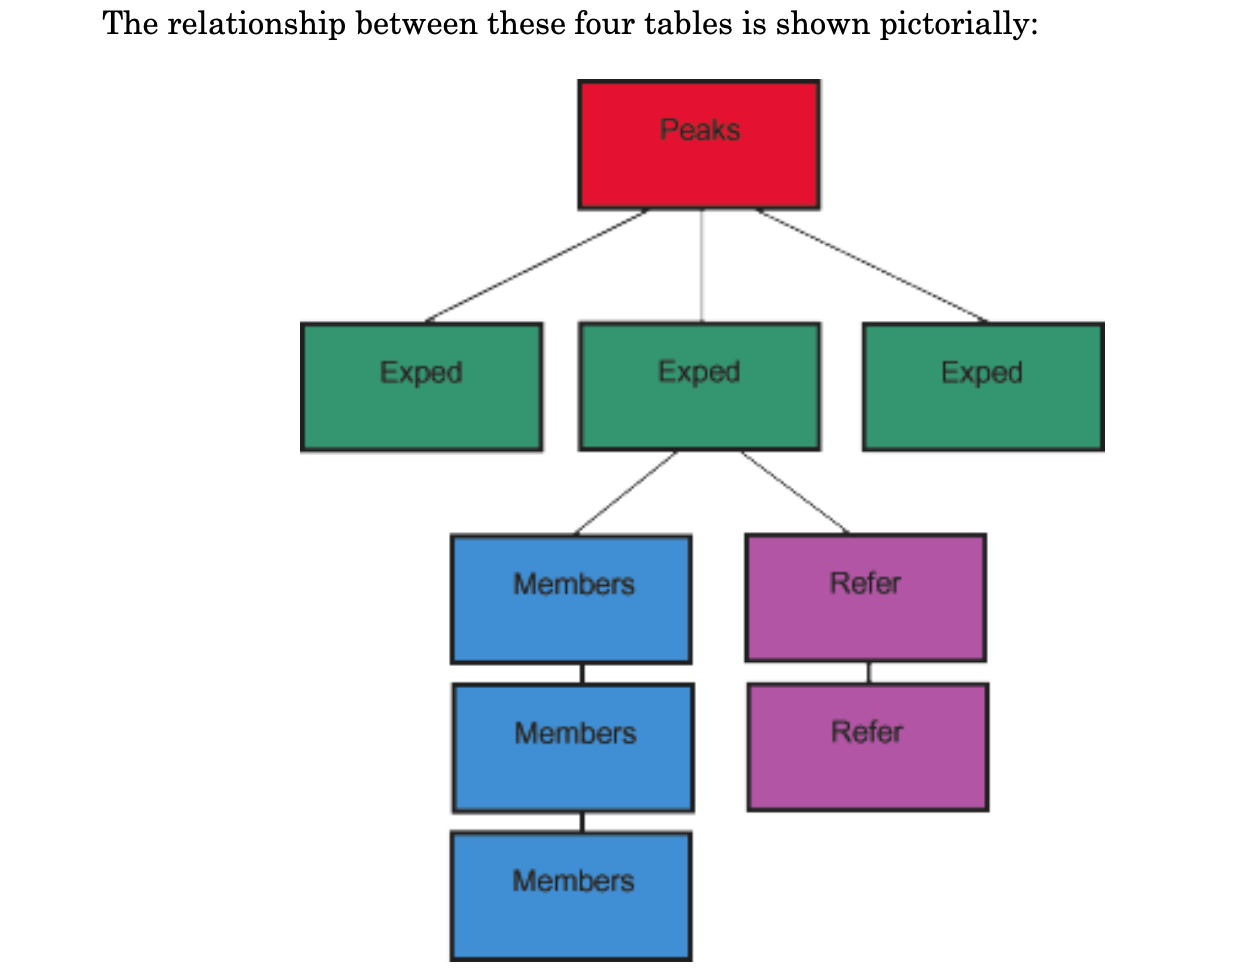

In [62]:
from IPython.display import Image
Image(filename = "data_model.png", width = 600, height = 300)

TODO

- https://observablehq.com/@d3/sortable-bar-chart

- Radar diagram para número de expedicioes por estación (primaavera, otoño...) a lo largo de los años. 

- Network diagram para enlazar expediciones. 

- Flow map para mostrar nacionalidades de las expediciones. ¿Tiene sentido?
- Ranking muertes por número ascensos. 
- Ranking más intentos fallidos. 
- Nacionalidades de las expediciones.

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To reach a high quality plot  
# Ref: https://ask.sagemath.org/question/48580/how-to-obtain-high-quality-plots-in-the-jupyter-notebook/

%config InlineBackend.figure_format = 'svg'

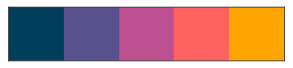

In [64]:
# Create my own palette

# Create an array with the colors you want to use
colors1 = ["#F1D302","#DFAB00","#00DFAC","#0099DF", "#C600DF","#DF0022"]  #https://galactic.ink/sphere/#
colors = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"]
# Set your custom color palette
my_palette = sns.color_palette(colors)
sns.set_palette(my_palette)
# Show the palette
sns.palplot(my_palette)

# Peaks

Information in pages 50-59 https://www.himalayandatabase.com/downloads/Himalayan%20Database%20Guide.pdf

In [65]:
# Load data

peaks = pd.read_excel('peaks.xlsx')
peaks.columns

Index(['PEAKID', 'PKNAME', 'PKNAME2', 'LOCATION', 'HEIGHTM', 'HEIGHTF',
       'HIMAL', 'REGION', 'OPEN', 'UNLISTED', 'TREKKING', 'TREKYEAR',
       'RESTRICT', 'PHOST', 'PSTATUS', 'PEAKMEMO', 'PYEAR', 'PSEASON',
       'PEXPID', 'PSMTDATE', 'PCOUNTRY', 'PSUMMITERS', 'PSMTNOTE', 'REFERMEMO',
       'PHOTOMEMO'],
      dtype='object')

In [67]:
# Filter 8000 m peaks

peaks = peaks[peaks['HEIGHTM'] >= 8000]
peaks['PKNAME']

2                Annapurna I
6           Annapurna I East
7         Annapurna I Middle
20                   Cho Oyu
30              Dhaulagiri I
42                   Everest
89     Kangchenjunga Central
91             Kangchenjunga
92       Kangchenjunga South
112                   Lhotse
117              Lhotse Shar
122                   Makalu
123                  Manaslu
188              Yalung Kang
205            Lhotse Middle
362         Yalung Kang West
Name: PKNAME, dtype: object

In [70]:
# Get only the useful columns

peaks = peaks[['PEAKID', 'PKNAME', 'HEIGHTM']]

In [71]:
# Check types

peaks.dtypes

PEAKID     object
PKNAME     object
HEIGHTM     int64
dtype: object

In [72]:
# Change column types 

peaks['PEAKID'] = peaks['PEAKID'].astype("string")
peaks['PKNAME'] = peaks['PKNAME'].astype("string")
peaks.dtypes

PEAKID     string
PKNAME     string
HEIGHTM     int64
dtype: object

In [73]:
# Create list with +8000 m peaks

peaks_8000m = list(peaks['PEAKID'])

# Expeditions

Information in page 60 https://www.himalayandatabase.com/downloads/Himalayan%20Database%20Guide.pdf

In [ ]:
# Load data and take only the +8000 m peaks

exped = pd.read_excel('exped.xlsx')
exped = exped[exped['PEAKID'].isin(peaks_8000m)]

In [ ]:
# Check types

exped.dtypes

In [15]:
# Change column types 

exped['PEAKID'] = exped['PEAKID'].astype("string")

In [16]:
# Add info from peaks dataframe

exped = exped.merge(peaks, on='PEAKID', how='left')

In [17]:
# Delete useless fields

exped.drop(['COUNTRIES','APPROACH','BCDATE','SMTTIME','TERMDATE','TRAVERSE',\
            'SKI','PARAPENTE', 'CAMPS', 'ROPE', 'SMTHIRED', 'SMTHIRED','OTHERSMTS',\
            'CAMPSITES','ROUTEMEMO', 'PRIMRTE','PRIMMEM','PRIMREF','PRIMID', 'CHKSUM'],\
           axis=1, inplace=True)

In [18]:
# Show column names

exped.columns

Index(['EXPID', 'PEAKID', 'YEAR', 'SEASON', 'HOST', 'ROUTE1', 'ROUTE2',
       'ROUTE3', 'ROUTE4', 'NATION', 'LEADERS', 'SPONSOR', 'SUCCESS1',
       'SUCCESS2', 'SUCCESS3', 'SUCCESS4', 'ASCENT1', 'ASCENT2', 'ASCENT3',
       'ASCENT4', 'CLAIMED', 'DISPUTED', 'SMTDATE', 'SMTDAYS', 'TOTDAYS',
       'TERMREASON', 'TERMNOTE', 'HIGHPOINT', 'TOTMEMBERS', 'SMTMEMBERS',
       'MDEATHS', 'TOTHIRED', 'HDEATHS', 'NOHIRED', 'O2USED', 'O2NONE',
       'O2CLIMB', 'O2DESCENT', 'O2SLEEP', 'O2MEDICAL', 'O2TAKEN', 'O2UNKWN',
       'ACCIDENTS', 'ACHIEVMENT', 'AGENCY', 'COMRTE', 'STDRTE', 'PKNAME',
       'LOCATION', 'HEIGHTM'],
      dtype='object')

In [19]:
# Check season id's

exped['SEASON'].unique()

array([1, 4, 2, 3, 0])

In [20]:
# Drop season = 0 and rename 

exped = exped[exped['SEASON'].isin((1,2,3,4))]
season_dic = {1:"Spring",2:"Summer",3:"Autumn",4:"Winter"}
exped['SEASON'].replace(season_dic, inplace=True)

In [23]:
# Grouping data

# Expeditions by peak
n_exped_by_peak = exped[['PEAKID','EXPID']].groupby(by='PEAKID',as_index=False).count()
n_exped_by_peak.rename(columns = {'EXPID': 'NEXPED'}, inplace = True)

# Expeditions by year
n_exped_by_year = exped[['YEAR','EXPID']].groupby(by='YEAR',as_index=False).count()
n_exped_by_year.rename(columns = {'EXPID': 'NEXPED'}, inplace = True)

#Expeditions by year and peak
n_exped_by_year_peak = exped[['YEAR','PKNAME','EXPID']].groupby(by=['YEAR', 'PKNAME'],as_index=False).count()
n_exped_by_year_peak.rename(columns = {'EXPID': 'NEXPED'}, inplace = True)

#Expeditions by season and peak
n_exped_by_season_peak = exped[['SEASON', 'PKNAME', 'EXPID']].groupby(by=['SEASON','PKNAME'],as_index=False).count()
n_exped_by_season_peak.rename(columns = {'EXPID': 'NEXPED'}, inplace = True)

# Visualizations


- Number expeditions by year.

- Number expeditions by peak.

- % peak expeditions by season.


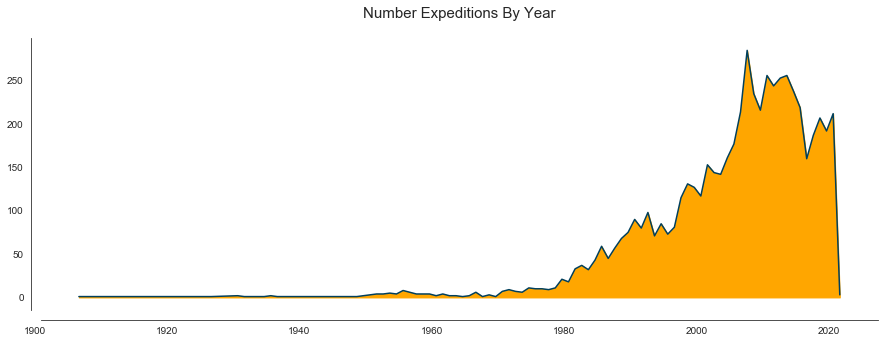

In [24]:
# Plot number expeditions by year

sns.set_style("white")
plt.figure(figsize = (15, 5))
sns.lineplot(x = n_exped_by_year['YEAR'], y = n_exped_by_year['NEXPED'], data = n_exped_by_year, color = "#003f5c")
sns.despine(left = False, offset = 10);
plt.title("Number Expeditions By Year", pad = 20, fontsize=15)
plt.ylabel("")
plt.xlabel("")
plt.xticks(rotation = 0, ha = 'right')
plt.fill_between(n_exped_by_year.YEAR.values, n_exped_by_year.NEXPED.values, color = "#ffa600")
plt.show()

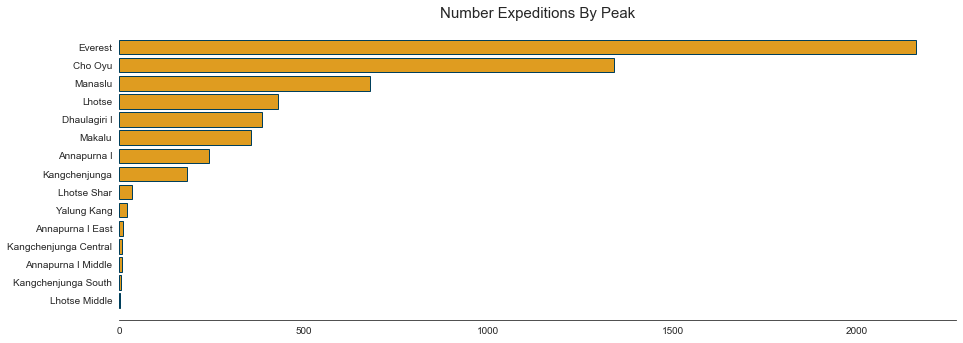

In [26]:
# Plot number expeditions by peak

sns.set_style("white")
plt.figure(figsize = (15, 5))
sns.countplot(y = exped['PKNAME'], data = exped, color = "#ffa600", edgecolor = "#003f5c", \
                   order = exped['PKNAME'].value_counts().index)
sns.despine(left = True, offset = 10);
plt.title("Number Expeditions By Peak", pad = 20, fontsize=15)
plt.ylabel("")
plt.xlabel("")
plt.show()

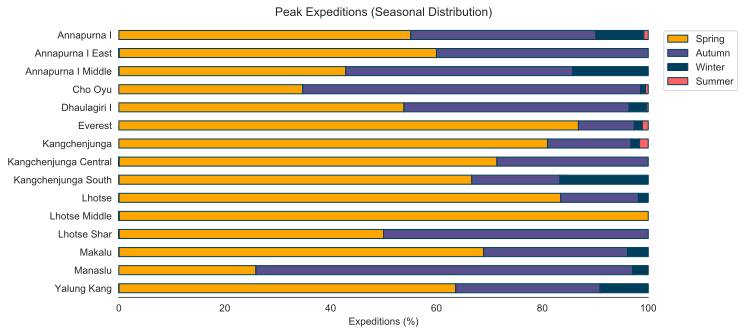

In [59]:
# Plot % peak expeditions by season 

total = exped.groupby('PKNAME')['EXPID'].count().reset_index()

summer = exped[exped['SEASON']=='Summer'].groupby('PKNAME')['EXPID'].count().reset_index()
winter = exped[exped['SEASON']=='Winter'].groupby('PKNAME')['EXPID'].count().reset_index()
spring = exped[exped['SEASON']=='Spring'].groupby('PKNAME')['EXPID'].count().reset_index()
autumn = exped[exped['SEASON']=='Autumn'].groupby('PKNAME')['EXPID'].count().reset_index()

summer = summer.merge(total, on='PKNAME', how = 'left')
winter = winter.merge(total, on='PKNAME', how = 'left')
spring = spring.merge(total, on='PKNAME', how = 'left')
autumn = autumn.merge(total, on='PKNAME', how = 'left')

summer['Summer'] = summer['EXPID_x'] / summer['EXPID_y'] * 100 
winter['Winter'] = winter['EXPID_x'] / winter['EXPID_y'] * 100 
spring['Spring'] = spring['EXPID_x'] / spring['EXPID_y'] * 100 
autumn['Autumn'] = autumn['EXPID_x'] / autumn['EXPID_y'] * 100 



total = total.merge(spring, on='PKNAME', how = 'left').merge(autumn, on='PKNAME', how = 'left')\
             .merge(winter, on='PKNAME', how = 'left').merge(summer, on='PKNAME', how = 'left')\
             [['PKNAME','Spring','Autumn','Winter','Summer']].set_index('PKNAME').sort_index(ascending=False)

ax = total.plot(kind="barh", stacked=True, figsize=(9.5,5), xlim=[0,100],\
           color = ['#ffa600', '#58508d','#003f5c','#ff6361'],edgecolor='#003f5c')

ax.set_title('Peak Expeditions (Seasonal Distribution)', fontsize = 12, pad = 10)
ax.set_xlabel("Expeditions (%)")
ax.set_ylabel("")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.legend(bbox_to_anchor=(1.02, 1.0));